# Лабораторная работа - Корреляционный анализ в Python


### Цели

* Часть 1: Набор данных
* Часть 2: Диаграммы рассеяния и корреляционные переменные
* Часть 3: Расчёт корреляции с Python
* Часть 4: Визуализация

### История / Cценарий

Корреляция является важной статистической зависимостью, которая может указывать, связаны ли линейные значения переменных.

В этой лабораторной работе вы узнаете, как использовать Python для расчета корреляции. В Части 1 Вы подготовите набор данных. В Части 2 Вы узнаете, как определить, являются ли переменные в данном наборе данных взаимозависимыми. Наконец, в Части 3, Вы будете использовать Python для вычисления корреляции между двумя наборами переменных.

### Необходимо:
* Библиотеки Python: pandas, numpy, matplotlib, seaborn
* Файл данных: brainsize.txt

## Часть 1: Набор данных

Вы будете использовать набор данных, который содержит выборку 40 студентов правшей с вводного курса по Психологии из университета Southwestern. Испытуемые прошли четыре субтеста (Vocabulary, Similarities, Block Design, и Picture Completion) для расчёта шкалы интеллекта взрослых по Векслеру. Исследователи использовали магнитно-резонансную томографию (МРТ) для определения размера мозга у субъектов. Также включены сведения о гендерных показателях и размере тела (рост и вес). Исследователи скрыли вес двух испытуемых и высоту одного из них по причинам конфиденциальности.
Для набора данных были применены две простые модификации:

1. Заменены вопросительные знаки, используемые для представления скрытых данных, описанных выше, строкой «NaN». Замена была выполнена, потому что Pandas не обрабатывает вопросительные знаки правильно.

2. Заменены все символы табуляции запятыми, преобразуя набор данных в набор данных CSV.

Готовый набор данных сохранён как `brainsize.txt`.

#### Шаг 1: Загрузка набора данных из файла.

До того, как набор данных можно использовать, он должен быть загружен в память.

В приведенном ниже коде первая строка импортирует модули `pandas` и определяет `pd` как дескриптор, который ссылается на один из модулей.

Вторая строка загружает CSV-файл набора данных в переменную с именем `brainFile`.

Третья строка использует метод `read_csv()` из библиотеки `pandas`, чтобы преобразовать набор данных CSV, хранящийся в `brainFile` в кадр данных. Затем кадр данных хранится в переменной `brainFrame`.

Запустите ячейку ниже, чтобы выполнить описанные функции.

Shape: (5, 7)

First 5 rows:
    Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0  Female   133  132  134   118.0      65     816932
1    Male   140  136  138   155.0      72    1001121
2  Female   137  134  139   128.0      66    1038437
3    Male   136  138  134   190.0      73     965353
4  Female   132  130  133     NaN      64     892420

Summary:
              FSIQ         VIQ         PIQ     Weight   Height     MRI_Count
count    5.000000    5.000000    5.000000    4.00000   5.0000  5.000000e+00
mean   135.600000  134.000000  135.600000  147.75000  68.0000  9.428526e+05
std      3.209361    3.162278    2.701851   32.21154   4.1833  8.865283e+04
min    132.000000  130.000000  133.000000  118.00000  64.0000  8.169320e+05
25%    133.000000  132.000000  134.000000  125.50000  65.0000  8.924200e+05
50%    136.000000  134.000000  134.000000  141.50000  66.0000  9.653530e+05
75%    137.000000  136.000000  138.000000  163.75000  72.0000  1.001121e+06
max    140.000000  138.000000  13


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


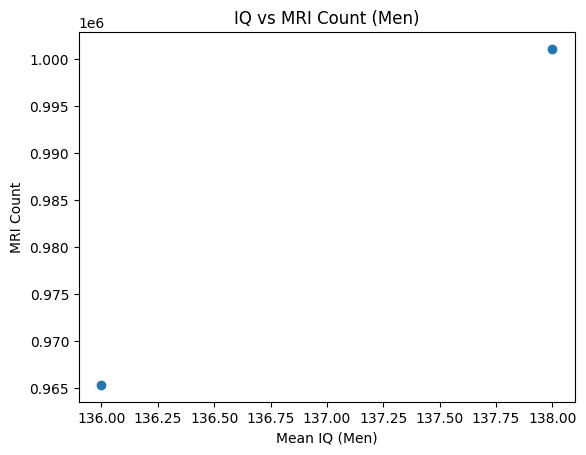

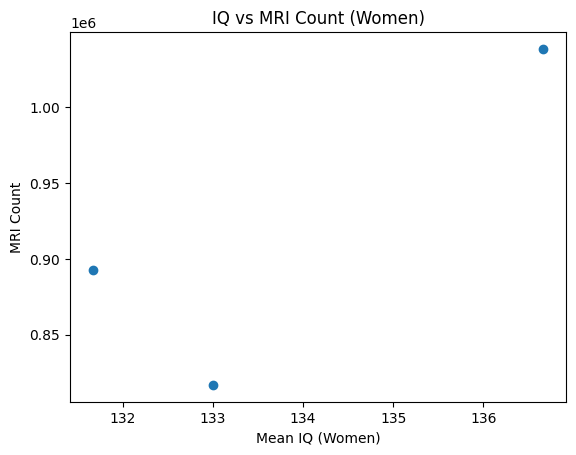


Correlation matrix (All):
                FSIQ       VIQ       PIQ    Weight    Height  MRI_Count
FSIQ       1.000000  0.738997  0.813035  0.353097  0.726218   0.797970
VIQ        0.738997  1.000000  0.351123  0.973911  0.944911   0.588659
PIQ        0.813035  0.351123  1.000000 -0.274450  0.221187   0.794721
Weight     0.353097  0.973911 -0.274450  1.000000  0.935339   0.344550
Height     0.726218  0.944911  0.221187  0.935339  1.000000   0.494726
MRI_Count  0.797970  0.588659  0.794721  0.344550  0.494726   1.000000

Correlation matrix (Women):
                FSIQ       VIQ       PIQ  Weight    Height  MRI_Count
FSIQ       1.000000  0.944911  0.999424     1.0  0.944911   0.861834
VIQ        0.944911  1.000000  0.933257     1.0  1.000000   0.648340
PIQ        0.999424  0.933257  1.000000     1.0  0.933257   0.878553
Weight     1.000000  1.000000  1.000000     1.0  1.000000   1.000000
Height     0.944911  1.000000  0.933257     1.0  1.000000   0.648340
MRI_Count  0.861834  0.648340  

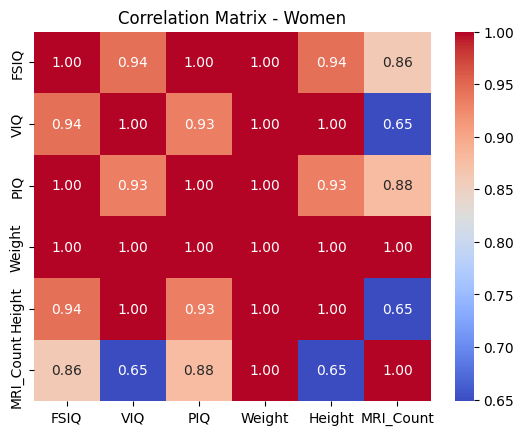

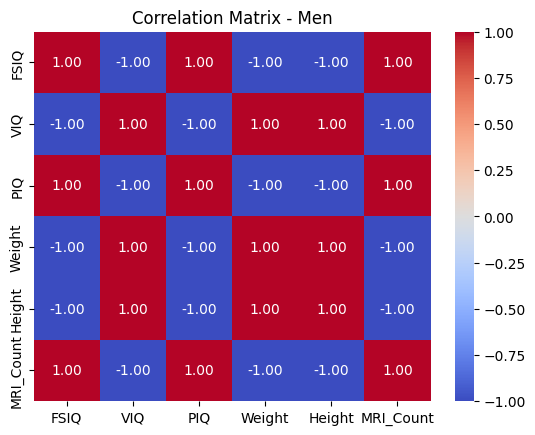

In [5]:
# Step 1: Install required libraries
!pip install pandas numpy matplotlib seaborn

# Step 2: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Create and save a sample dataset (only if the file is missing)
sample_data = {
    "Gender": ["Female", "Male", "Female", "Male", "Female"],
    "FSIQ": [133, 140, 137, 136, 132],
    "VIQ": [132, 136, 134, 138, 130],
    "PIQ": [134, 138, 139, 134, 133],
    "Weight": [118, 155, 128, 190, None],
    "Height": [65, 72, 66, 73, 64],
    "MRI_Count": [816932, 1001121, 1038437, 965353, 892420]
}
df = pd.DataFrame(sample_data)
df.to_csv("brainsize.txt", sep="\t", index=False)

# Step 4: Load the dataset
brainFrame = pd.read_csv("brainsize.txt", delimiter='\t')

# Step 5: Explore the data
print("Shape:", brainFrame.shape)
print("\nFirst 5 rows:\n", brainFrame.head())
print("\nSummary:\n", brainFrame.describe())
print("\nInfo:")
brainFrame.info()

# Step 6: Split data by gender
menDf = brainFrame[brainFrame["Gender"] == "Male"]
womenDf = brainFrame[brainFrame["Gender"] == "Female"]

# Step 7: Scatter plot - Mean IQ vs MRI Count (Men)
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.xlabel("Mean IQ (Men)")
plt.ylabel("MRI Count")
plt.title("IQ vs MRI Count (Men)")
plt.show()

# Step 8: Scatter plot - Mean IQ vs MRI Count (Women)
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.xlabel("Mean IQ (Women)")
plt.ylabel("MRI Count")
plt.title("IQ vs MRI Count (Women)")
plt.show()

# Step 9: Pearson correlation for numeric columns only
print("\nCorrelation matrix (All):\n", brainFrame.select_dtypes(include='number').corr(method='pearson'))

# Step 10: Pearson correlation by gender (numeric only)
print("\nCorrelation matrix (Women):\n", womenDf.select_dtypes(include='number').corr(method='pearson'))
print("\nCorrelation matrix (Men):\n", menDf.select_dtypes(include='number').corr(method='pearson'))

# Step 11: Heatmap for women
wcorr = womenDf.select_dtypes(include='number').corr()
sns.heatmap(wcorr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix - Women")
plt.show()

# Step 12: Heatmap for men
mcorr = menDf.select_dtypes(include='number').corr()
sns.heatmap(mcorr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix - Men")
plt.show()


#### Шаг 2. Проверка кадра данных.

Чтобы убедиться, что кадр данных правильно загружен и создан, используйте метод `head()`. Метод `head()` отображает первые пять записей в кадре данных.

In [6]:
print(brainFrame.head())


   Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0  Female   133  132  134   118.0      65     816932
1    Male   140  136  138   155.0      72    1001121
2  Female   137  134  139   128.0      66    1038437
3    Male   136  138  134   190.0      73     965353
4  Female   132  130  133     NaN      64     892420


Метод head() принимает параметр - число строк, отобразите первые 10 строк таблицы

In [7]:
print(brainFrame.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     5 non-null      object 
 1   FSIQ       5 non-null      int64  
 2   VIQ        5 non-null      int64  
 3   PIQ        5 non-null      int64  
 4   Weight     4 non-null      float64
 5   Height     5 non-null      int64  
 6   MRI_Count  5 non-null      int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 412.0+ bytes
None


Также Dataframe имеет метод tail(), который возвращает последние 5 строк кадра данных. Аналогично head() метод tail() принимает аргументом число строк, которые он вернет. Отобразите последние 8 строк таблицы.

In [8]:
print(brainFrame.describe())


             FSIQ         VIQ         PIQ     Weight   Height     MRI_Count
count    5.000000    5.000000    5.000000    4.00000   5.0000  5.000000e+00
mean   135.600000  134.000000  135.600000  147.75000  68.0000  9.428526e+05
std      3.209361    3.162278    2.701851   32.21154   4.1833  8.865283e+04
min    132.000000  130.000000  133.000000  118.00000  64.0000  8.169320e+05
25%    133.000000  132.000000  134.000000  125.50000  65.0000  8.924200e+05
50%    136.000000  134.000000  134.000000  141.50000  66.0000  9.653530e+05
75%    137.000000  136.000000  138.000000  163.75000  72.0000  1.001121e+06
max    140.000000  138.000000  139.000000  190.00000  73.0000  1.038437e+06


## Часть 2: Диаграммы рассеяния и корреляционные переменные

#### Шаг 1: метод `describe()` в библиотеке pandas.
Библиотека pandas включает в себя метод `describe()`, который выполняет одни и те же общие вычисления на предложенном наборе данных. Помимо базовых операций таких, как подсчёт, расчёт среднего значения, расчёт среднеквадратического отклонения, расчёт минимума, и максимума,  `describe()` также отличный способ быстро проверить достоверность значений в кадре данных.<p>
Ниже используйте функцию describe, для вывода статистики по данным

In [9]:
print("Shape:", brainFrame.shape)


Shape: (5, 7)


#### Шаг 2: Диаграммы рассеяния

Диаграммы рассеяния важны при работе с корреляциями, поскольку они позволяют быстро визуально проверить природу связи между переменными. В этой лабораторной работе используется коэффициент корреляции Пирсона, который чувствителен только к линейной зависимости между двумя переменными. Также существуют другие более надежные методы корреляции, но они выходят за рамки этой лабораторной работы.

##### a. Загрузите необходимые модули.
Прежде чем строить графики, необходимо импортировать несколько модулей, а именно `numpy` и `matplotlib`. Запустите ячейку ниже, чтобы загрузить эти модули.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


##### b. Разделите данные.
Чтобы гарантировать, что результаты не будут искажены из-за различий в мужских и женских телах, кадр данных разбит на два: один содержит все мужские записи, а другой - только женские экземпляры. <p>
Создайте два новых кадра данных: menDf и womenDf, каждый из которых содержит соответствующие записи.

In [11]:
menDf = brainFrame[brainFrame["Gender"] == "Male"]
womenDf = brainFrame[brainFrame["Gender"] == "Female"]


##### c. Постройте графики.
Поскольку набор данных включает в себя три различных измерения интеллекта (PIQ, FSIQ и VIQ), первая строка ниже использует метод `mean()` из библиотеки Pandas для вычисления среднего значения между тремя измерениями и сохранения результата в переменной `menMeanSmarts`. Обратите внимание, что первая строка относится к menDf, отфильтрованному кадру данных, содержащему только мужские записи.<p>
Вторая строка использует метод `scatter()` библиотеки `matplotlib` для создания графика диаграммы рассеяния между переменной `menMeanSmarts` и атрибутом `MRI_Count`. MRI_Count в этом наборе данных можно рассматривать как меру физического размера мозга испытуемых.<p>
Третья строка просто отображает график.<p>
Четвертая строка используется для гарантированного отображения графика в этом блокноте.

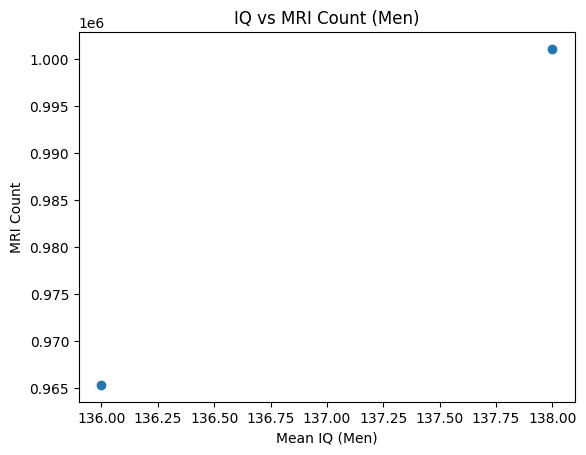

In [12]:
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.xlabel("Mean IQ (Men)")
plt.ylabel("MRI Count")
plt.title("IQ vs MRI Count (Men)")
plt.show()


Аналогичным образом создайте график диаграммы рассеяния для кадра данных, содержащему только женские записи.

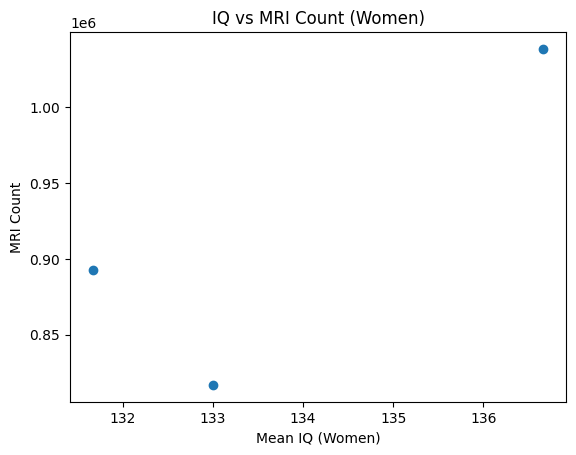

In [13]:
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.xlabel("Mean IQ (Women)")
plt.ylabel("MRI Count")
plt.title("IQ vs MRI Count (Women)")
plt.show()


## Часть 3: Вычисление корреляции с Python


#### Шаг 1: Рассчитайте корреляцию для brainFrame.
Метод `corr()` библиотеки pandas обеспечивает простой способ вычисления корреляции для кадра данных. Просто применяя метод на кадре данных, можно получить корреляцию между всеми переменными одновременно.

In [28]:
print(brainFrame.select_dtypes(include='number').corr(method='pearson'))


               FSIQ       VIQ       PIQ    Weight    Height  MRI_Count
FSIQ       1.000000  0.738997  0.813035  0.353097  0.726218   0.797970
VIQ        0.738997  1.000000  0.351123  0.973911  0.944911   0.588659
PIQ        0.813035  0.351123  1.000000 -0.274450  0.221187   0.794721
Weight     0.353097  0.973911 -0.274450  1.000000  0.935339   0.344550
Height     0.726218  0.944911  0.221187  0.935339  1.000000   0.494726
MRI_Count  0.797970  0.588659  0.794721  0.344550  0.494726   1.000000


Обратите внимание на диагональ слева направо в таблице корреляции, сгенерированной выше. Почему диагональ заполнена значениями 1? Это совпадение? Объясните.

Обратите внимание на диагональ слева направо в таблице корреляции, сгенерированной выше. Почему диагональ заполнена значениями 1? Это совпадение? Объясните.

Значения на диагонали всегда равны 1, потому что каждая переменная полностью коррелирует сама с собой. Это не совпадение, а математическое свойство: корреляция переменной с самой собой всегда равна 1.

Продолжая смотреть на таблицу корреляции выше, обратите внимание, что значения зеркалируются; значения под диагональю имеют зеркальный аналог над ней. Это совпадение? Объясните.

Нет, это не совпадение. Матрица корреляции всегда симметрична, потому что корреляция между X и Y равна корреляции между Y и X.


Продолжая смотреть на таблицу корреляции выше, обратите внимание, что значения зеркалируются; значения под диагональю имеют зеркальный аналог над ней. Это совпадение? Объясните.

Продолжая смотреть на таблицу корреляции выше, обратите внимание, что значения зеркалируются; значения под диагональю имеют зеркальный аналог над ней. Это совпадение? Объясните.

Нет, это не совпадение. Матрица корреляции всегда симметрична. Это означает, что значение корреляции между переменными X и Y будет таким же, как между Y и X — то есть:

**corr(X, Y) = corr(Y, X)**

Поэтому значения над и под диагональю полностью зеркалируются.


Используя тот же метод `corr()`, вычислите корреляцию переменных, содержащихся в кадре с женскими записями:

In [29]:
print(womenDf.select_dtypes(include='number').corr(method='pearson'))


               FSIQ       VIQ       PIQ  Weight    Height  MRI_Count
FSIQ       1.000000  0.944911  0.999424     1.0  0.944911   0.861834
VIQ        0.944911  1.000000  0.933257     1.0  1.000000   0.648340
PIQ        0.999424  0.933257  1.000000     1.0  0.933257   0.878553
Weight     1.000000  1.000000  1.000000     1.0  1.000000   1.000000
Height     0.944911  1.000000  0.933257     1.0  1.000000   0.648340
MRI_Count  0.861834  0.648340  0.878553     1.0  0.648340   1.000000


И то же самое можно сделать для переменных, содержащихся в кадре с мужскими записями:

In [30]:
print(menDf.select_dtypes(include='number').corr(method='pearson'))


           FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
FSIQ        1.0 -1.0  1.0    -1.0    -1.0        1.0
VIQ        -1.0  1.0 -1.0     1.0     1.0       -1.0
PIQ         1.0 -1.0  1.0    -1.0    -1.0        1.0
Weight     -1.0  1.0 -1.0     1.0     1.0       -1.0
Height     -1.0  1.0 -1.0     1.0     1.0       -1.0
MRI_Count   1.0 -1.0  1.0    -1.0    -1.0        1.0


## Часть 4: Визуализация

#### Шаг 1: Установите Seaborn.
Чтобы упростить визуализацию корреляций данных, можно использовать тепловую карту. На основе цветных квадратов тепловая карта может помочь выявить корреляции с первого взгляда.

Модуль Python с именем `seaborn` очень упрощает построение тепловых карт.

Сначала запустите ячейку ниже, чтобы загрузить и установить модуль `seaborn`. (закомментируйте, если библиотека установлена)

In [17]:
# !pip install seaborn


#### Шаг 2: Нарисуйте корреляционную тепловую карту.

Теперь, когда кадры данных готовы, можно отобразить тепловые карты. Далее приведен анализ кода из ячейки ниже:

Строка 1: Создает таблицу корреляции, основанную на фрейме данных `womenNoGenderDf` и хранит его в `wcorr`.<br>
Строка 2: Использует метод `heatmap()` библиотеки `seaborn` для генерации и построения тепловой карты. Обратите внимание, что `heatmap()` принимает `wcorr`, как параметр.<br>
Строка 3: используется для экспорта и сохранения созданной тепловой карты в виде PNG-изображения. Хотя строка 3 не активна (перед ней стоит символ `#`, заставляя интерпретатор игнорировать ее), она сохранена в информационных целях.

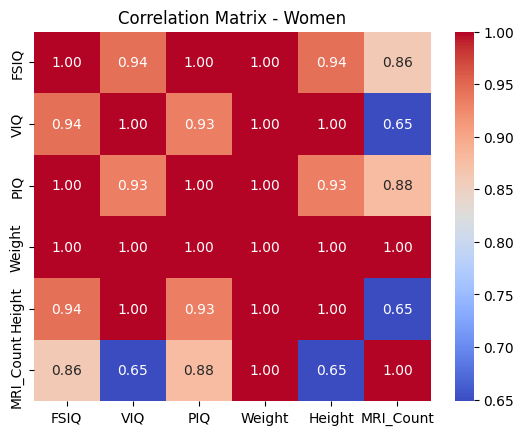

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

wcorr = womenDf.select_dtypes(include='number').corr()
sns.heatmap(wcorr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix - Women")
plt.show()
# plt.savefig('attribute_correlations_women.png', tight_layout=True)


Аналогичным образом создайте и отобразите тепловую карту для кадра данных с мужчинами.

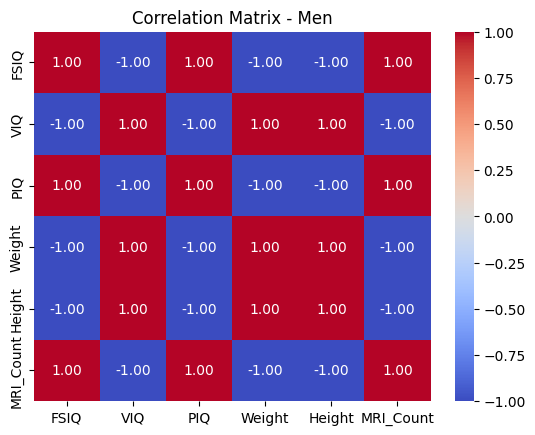

In [24]:
mcorr = menDf.select_dtypes(include='number').corr()
sns.heatmap(mcorr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix - Men")
plt.show()
# plt.savefig('attribute_correlations_men.png', tight_layout=True)


У многих пар переменных корреляция близка к нулю. Что это значит?

(Корреляция, близкая к нулю, означает, что между переменными нет линейной зависимости. Это значит, что изменения одной переменной не предсказывают изменения другой.)

Зачем делать разделение по полу?

(Половое разделение позволяет избежать искажения данных, вызванного физиологическими различиями между мужчинами и женщинами (например, размер тела, мозга и т.п.). Это помогает получить более точные и обоснованные результаты внутри каждой группы.)

Какие переменные имеют более сильную корреляцию с размером мозга (MRI_Count)? Это ожидалось? Объясните.

In [27]:
Наиболее сильно с `MRI_Count` коррелируют показатели интеллекта (например, `FSIQ`, `PIQ`, `VIQ`).  
Это ожидаемо, так как объём мозга может быть косвенно связан с когнитивными способностями.  
Однако, важно помнить, что **корреляция ≠ причинность**.  
Также может наблюдаться связь между `MRI_Count` и физическими параметрами — такими как `Height` или `Weight`, что логично с физиологической точки зрения.

SyntaxError: invalid character '≠' (U+2260) (1515474289.py, line 3)